
# Building GUIs with Python for First year Physics Students
## An Introductory Tutorial Using Tkinter
---
### 1. Introduction

**Why Use a GUI?**

A **Graphical User Interface (GUI)** makes interacting with programs easier and more intuitive by providing graphical elements such as buttons, text boxes, and file dialogs. While command-line programs are efficient, they may not be user-friendly for everyone. GUIs provide a visual way for users to interact with applications, making them more accessible for a wider audience.

GUIs are useful in physics applications for tasks like:
- Importing and visualizing data from experiments.
- Providing control panels for simulations.
- Allowing users to tweak parameters without modifying code.

In this tutorial, we will guide you through the process of building a simple GUI using Python's **Tkinter** library. By the end, you will have built a program that allows you to import and plot data, which can be useful for data analysis and visualization in physics.


### 2. Getting Started: Importing Tkinter

To start we need to import a libraby called Tkinter. After doing this we need to create a main application window. If you want any help or look at an example of Tkinter, take a look at the official tutorial of Tkinter library https://tkdocs.com/tutorial/firstexample.html .

In [39]:
# Import the required libraries
import tkinter as tk

Now create a main application window with the Tk command and give it a title with title

In [40]:
# Create a window
root = tk.Tk()

# Set window title
root.title("Simple Tkinter GUI")


''

What is left to do, is to give it a certain size and run it!

In [41]:

# Set window size
root.geometry("400x300")

# Run the application
root.mainloop()

As you can see it opens an external window and the cell keeps running until you close this window


### 3. Adding a Button

Next, let's add a simple button to the window. This button can be added with the Button command. To do this please import first again the previous steps also in this cell to create a new window with a new title. Otherwise you are going to run into some errors.


In [42]:
# Create a window
root = tk.Tk()
root.title("Button Example")
root.geometry("400x300")

# Create a button and place it in the window
button = tk.Button(root, text="Click Me")
button.pack()

# Run the application
root.mainloop()



### 4. Moving the Button (Using Layout Managers)

After we have added a button, it is very useful to be able to use multiple buttons in a GUI and be able to place them wherever you would like
Tkinter provides several layout managers, such as `pack()`, `grid()`, and `place()`, to arrange widgets in a window. In this cell place a button wherever you like with one of these managers. Again please create a new window


In [43]:
# Create a window
root = tk.Tk()
root.title("Positioning Button")
root.geometry("400x300")

# Create a button and place it at specific coordinates
button = tk.Button(root, text="Click Me")
button.place(x=150, y=100)  # x, y coordinates

# Run the application
root.mainloop()



### 5. Adding Functionality: Button Click Event

A button is very nice but it is does not do anything it is quite useless. Although some app developers have made quite a lot of money with useless apps. Let's add some functionality to the button, such as printing a message when clicked. This can be done by expanding the Button command.


In [44]:
# Create a function to be called when the button is clicked
def on_button_click():
    print("Button was clicked!")

# Create a window
root = tk.Tk()
root.title("Button Event")
root.geometry("400x300")

# Create a button and bind the function to it
button = tk.Button(root, text="Click Me", command=on_button_click)
button.place(x=150, y=100)

# Run the application
root.mainloop()


Button was clicked!
Button was clicked!
Button was clicked!



### 6. Adding an Import File Button

Many physics applications require users to import data files. Let's create a button that allows users to browse and select a file. There is a very useful command inside the tkinter package called filedialog.askopenfilename. Create a function with this command and check if it opens your 'Windows Explorer' or in dutch 'Verkenner' to see your data files and choose a file.


In [45]:
from tkinter import filedialog

# Create a function to open a file dialog
def import_file():
    file_path = filedialog.askopenfilename()
    print("File selected:", file_path)

# Create a window
root = tk.Tk()
root.title("File Import")
root.geometry("400x300")

# Create a button to import a file
import_button = tk.Button(root, text="Import File", command=import_file)
import_button.place(x=150, y=100)

# Run the application
root.mainloop()


File selected: 



### 7. Final Exercise: Building a Data Import and Plotting GUI

Now let's combine everything, this is more difficult than the previous exercises and will take more effort to copmlete this. We will also introduce another python package here which is very usefull called pandas. This package has many functions built in to import, read and export data files of different types. In this case a simple csv file with data on x and y can be downloaded here. 

We will build a GUI that allows users to import a CSV file and plot its data using `matplotlib`. First make a function where you use the previous command filedialog.askopenfilename and then read a file with pandas. Google how to use pandas, and finally in this function also include a few statements to make a correct figure with labels etcetera.

The next code let's you import a csv file and make a plot but it plots it outside the window


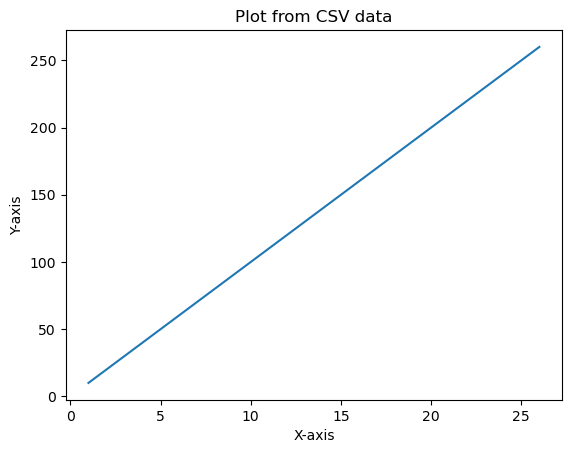

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to open file dialog and import a CSV file
def import_and_plot():
    file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
    if file_path:
        data = pd.read_csv(file_path,delimiter = ';')
        # Assuming the file has two columns: x and y
        plt.plot(data['x'], data['y'])
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title('Plot from CSV data')
        plt.show()

# Create the GUI window
root = tk.Tk()
root.title("Data Import and Plot")
root.geometry("400x300")

# Create a button to import and plot data
plot_button = tk.Button(root, text="Import CSV and Plot", command=import_and_plot)
plot_button.place(x=130, y=130)

# Run the application
root.mainloop()



### 8.Bonus exercise, building a GUI that is constantly open and able to load new data files if requested and change the axes if necessary.

This is more difficult and we want a window where you can constantly choose new files, set the new axes labels etcetera. For this to work we need different functions, first of all a function to import the data as previously described, it is nice to work with functions such as message_label.config to show a text which file is selected, and a function to read how many columns are present in the CSV file. In this main function also include a reference to a function that can rename the columns. 

For this renaming it is an option to create two different functions. One function to create entry fields to type a new name for the entries. A function to rename the columns also be made with the config function. Include in this function also an entry so you can actually enter something.
Secondly, create a function that actually applies these 'renames'.

Since we want to be able to constantly upload new data, also make a function to reset the widget. This can be done with the destroy and .clear functions. Look into these to understand how they work.

Finally make a function to actually plot the data with matplotlib. This should be the easiest step ;).

Last step, create buttons that refer to the functions that you create and voila you have a very nice GUI. You can ofcourse add a lot of different functionalities




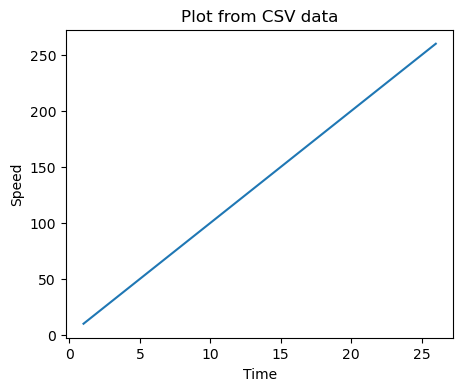

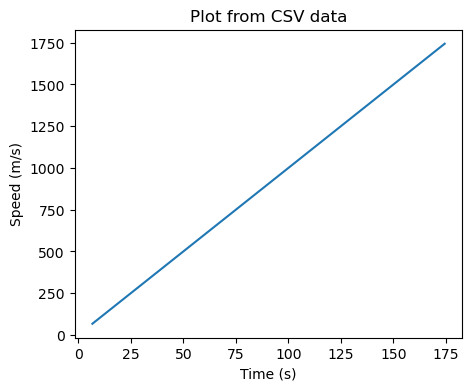

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Global variable to hold the data
current_data = None

# Function to open file dialog and import a CSV file
def import_and_display_info():
    global current_data

    # Clear previous data and reset widgets
    reset_widgets()

    file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
    
    if file_path:
        # Read CSV file and store it globally
        current_data = pd.read_csv(file_path, delimiter = ';')
        message_label.config(text=f"File selected: {file_path}")

        # Show the number of columns and allow renaming
        col_count = len(current_data.columns)
        num_columns_label.config(text=f"Number of columns: {col_count}")

        # Dynamically create entry boxes for renaming columns
        create_rename_entries(current_data.columns)
    else:
        message_label.config(text="No file selected.")

# Function to create entry fields to rename columns
def create_rename_entries(columns):
    rename_label.config(text="Rename columns (optional):")
    for i, col_name in enumerate(columns):
        tk.Label(rename_frame, text=f"Column {i+1} ({col_name}):").grid(row=i, column=0, padx=5, pady=5)
        entry = tk.Entry(rename_frame)
        entry.grid(row=i, column=1, padx=5, pady=5)
        rename_entries.append(entry)

# Function to reset the widgets when a new file is loaded
def reset_widgets():
    # Clear previous entries, labels, and plot
    rename_label.config(text="")
    for widget in rename_frame.winfo_children():
        widget.destroy()
    for widget in plot_frame.winfo_children():
        widget.destroy()
    rename_entries.clear()

# Function to apply the renaming of columns
def apply_rename():
    global current_data
    if current_data is not None:
        new_column_names = [entry.get() for entry in rename_entries if entry.get()]
        if len(new_column_names) == len(current_data.columns):
            current_data.columns = new_column_names
            message_label.config(text="Column names updated.")
        else:
            message_label.config(text="Not all columns were renamed. Keeping original names.")

# Function to plot the data based on the current data and column names
def plot_data():
    global current_data
    if current_data is not None and len(current_data.columns) >= 2:
        fig, ax = plt.subplots(figsize=(5, 4))
        ax.plot(current_data[current_data.columns[0]], current_data[current_data.columns[1]])
        ax.set_xlabel(current_data.columns[0])
        ax.set_ylabel(current_data.columns[1])
        ax.set_title('Plot from CSV data')

        # Embed the plot in the Tkinter window
        canvas = FigureCanvasTkAgg(fig, master=plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()
    else:
        message_label.config(text="Not enough columns to plot.")

# GUI setup
root = tk.Tk()
root.title("Data Import and Plot")
root.geometry("800x600")

# Global widgets and lists
rename_entries = []  # To store column rename entry fields

# Frames
plot_frame = tk.Frame(root)
plot_frame.pack(pady=10)

rename_frame = tk.Frame(root)
rename_frame.pack(pady=10)

# Labels and buttons
message_label = tk.Label(root, text="Select a CSV file to import and plot.")
message_label.pack(pady=5)

num_columns_label = tk.Label(root, text="")
num_columns_label.pack(pady=5)

rename_label = tk.Label(root, text="")
rename_label.pack()

plot_button = tk.Button(root, text="Import CSV and Display Info", command=import_and_display_info)
plot_button.pack(pady=10)

apply_rename_button = tk.Button(root, text="Apply Renaming", command=apply_rename)
apply_rename_button.pack(pady=5)

change_units_button = tk.Button(root, text="Change Units (multiply by 1.60934)", command=change_units)
change_units_button.pack(pady=5)

plot_data_button = tk.Button(root, text="Plot Data", command=plot_data)
plot_data_button.pack(pady=10)

# Run the application
root.mainloop()



### 8. Conclusion

In this tutorial, we introduced the concept of building GUIs using Python and Tkinter. You’ve learned how to:
- Create a basic GUI window.
- Add buttons and other interactive elements.
- Handle file imports.
- Visualize imported data using plotting tools like `matplotlib`.

With these basic skills, you can now start building more complex applications tailored to your needs, such as creating control panels for simulations or visualizing experimental data in physics.
